In [1]:
!pip install open_clip_torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 70.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 22.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 KB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 70.3 MB/s

In [36]:
print('hi')

hi


In [89]:
import torch

print(torch.cuda.is_available())

print(torch.__version__)  # Версия PyTorch
print(torch.version.cuda)  # Версия CUDA, используемая PyTorch
print(torch.backends.cudnn.version())  # Версия cuDNN
print(torch.cuda.device_count())  # Количество доступных GPU
print(torch.cuda.get_device_name(0))  # Название первого GPU

True
2.5.1+cu124
12.4
90100
1
Tesla V100-SXM3-32GB


In [90]:
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
    model_name="coca_ViT-L-14",
    pretrained="mscoco_finetuned_laion2B-s13B-b90k",
    device="cuda"
)
model = model.to('cuda')
print(next(model.parameters()).device)

cuda:0


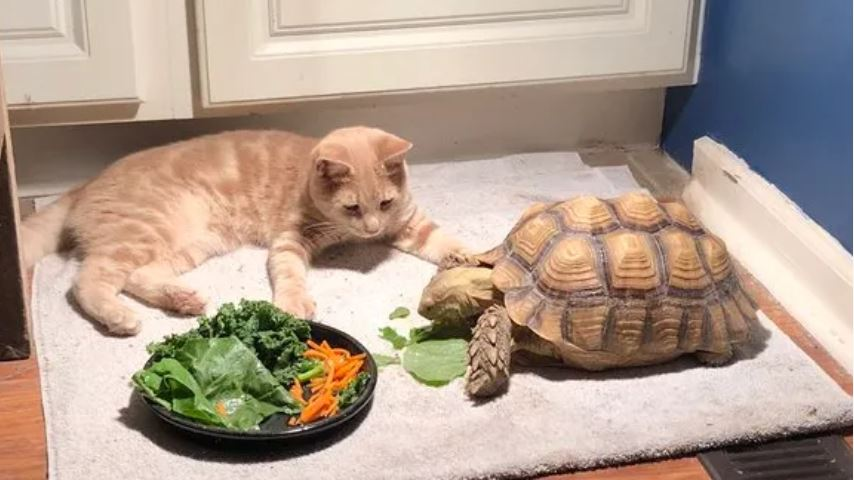

In [39]:
from IPython.display import Image
Image('cat.jpg')

In [91]:
from PIL import Image
def describe(image_path):
    im = Image.open(image_path).convert("RGB")
    im = transform(im).unsqueeze(0)
    im = im.to('cuda').half()
    with torch.no_grad(), torch.amp.autocast('cuda'):
        generated = model.generate(im)
    res = open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", "")  
    #print(res)
    return res    

In [92]:
describe('cat.jpg')

'a cat laying on the ground next to a turtle . '

In [27]:
!pip install catboost scikit-learn nltk

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/user1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


In [52]:
import os
import pandas as pd
from PIL import Image

In [62]:
def create_dataset(root_dir):
    data = []
    for category in os.listdir(root_dir):
        print(category)
        category_data = []
        category_path = os.path.join(root_dir, category)
        #counter = 0
        if os.path.isdir(category_path):
            for image_name in os.listdir(category_path):
                #counter += 1
                #if counter >= 2:
                #    counter = 0
                #    break
                print("-- "+image_name)
                image_path = os.path.join(category_path, image_name)
                if os.path.isfile(image_path):
                    try:
                        # Открываем изображение для проверки, что это действительно изображение
                        #with Image.open(image_path) as img:
                        #    img.verify()
                        
                        # Получаем описание картинки
                        description = describe(image_path)
                        
                        # Добавляем данные в список
                        data.append({
                            'image_id': image_name,
                            'description': description,
                            'category': category
                        })
                    except (IOError, SyntaxError) as e:
                        print(f"Ошибка при обработке файла {image_path}: {e}")                                
    
    # Создаем pandas DataFrame
    df = pd.DataFrame(data)
    return df



In [63]:
# Пример использования
root_dir = './train_data_rkn/dataset/'
dataset = create_dataset(root_dir)

Winter melon
-- 47eeb00280da5487.jpg
-- 109981576952d4e3.jpg
-- 1f3542ae9f5362ea.jpg
-- 04d66df71eff7e47.jpg
-- 60113ceb1d15b850.jpg
-- 1e83bb3103926450.jpg
-- 0a13acc0337f2450.jpg
-- 7b231dd60d9c033f.jpg
-- 549fd73acedde7de.jpg
-- fea3afd394a49024.jpg
-- 69dc523f61bdbfe2.jpg
-- 11c69b87536a9a88.jpg
-- 0214bfce993f1979.jpg
-- 362151889473218c.jpg
-- 1b304c6f47203dcc.jpg
-- 05b0266e53d903ca.jpg
-- 4febef870875affc.jpg
-- b67c471b21b444b1.jpg
-- 69fc97d3a4a091ad.jpg
-- 0589cfe21c221da2.jpg
-- 3d8be4f881b8c54c.jpg
-- 1054f6555090b859.jpg
-- 17ef7efc40710a51.jpg
-- 364b6baefef6521b.jpg
-- 159990163d5a90c8.jpg
-- 1cd7d63a138cff03.jpg
-- 63568f148c7a33c3.jpg
-- 61740a6756b6b589.jpg
-- 06c819013b9a6b77.jpg
-- 287a07f060016234.jpg
-- 2ca78f5afcb8d25d.jpg
-- 149f18647c3e83a2.jpg
-- 199d18f0328b8ee1.jpg
-- 29356ad63c5b1455.jpg
-- b7b68b50a0291732.jpg
-- 39f2c57b6987f756.jpg
-- 01d72e99379eadf9.jpg
Rhinoceros
-- e007e342a4ec255c.jpg
-- 4c0d29fe5b23a623.jpg
-- 5668c361ea2beb78.jpg
-- 4510c9c2eefd9

In [64]:
dataset.to_csv("dataset_big.csv", sep=',', index=False)

In [65]:
dataset

,image_id,description,category
0,47eeb00280da5487.jpg,"a close up of a watermelon that says "" take fe...",Winter melon
1,109981576952d4e3.jpg,many different types of pumpkins and gourds on...,Winter melon
2,1f3542ae9f5362ea.jpg,a person holding a cucumber on a wooden surfac...,Winter melon
3,04d66df71eff7e47.jpg,a close up of a green apple on a white plate .,Winter melon
4,60113ceb1d15b850.jpg,several watermelons on a red and white checker...,Winter melon
...,...,...,...
19297,09dbcab44c14c3bc.jpg,a metal strainer sitting on top of a wooden ta...,Spatula
19298,9cd0b3abc3a2c99c.jpg,a wooden cutting board with a wooden spoon on ...,Spatula
19299,02cf476ab657e8bd.jpg,a bowl of butter is being stirred in a pot .,Spatula
19300,0344785a017741b0.jpg,a man is cooking food on a grill .,Spatula


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report


In [67]:
# Загрузка данных
data = pd.read_csv('dataset_big.csv')
data

,image_id,description,category
0,47eeb00280da5487.jpg,"a close up of a watermelon that says "" take fe...",Winter melon
1,109981576952d4e3.jpg,many different types of pumpkins and gourds on...,Winter melon
2,1f3542ae9f5362ea.jpg,a person holding a cucumber on a wooden surfac...,Winter melon
3,04d66df71eff7e47.jpg,a close up of a green apple on a white plate .,Winter melon
4,60113ceb1d15b850.jpg,several watermelons on a red and white checker...,Winter melon
...,...,...,...
19297,09dbcab44c14c3bc.jpg,a metal strainer sitting on top of a wooden ta...,Spatula
19298,9cd0b3abc3a2c99c.jpg,a wooden cutting board with a wooden spoon on ...,Spatula
19299,02cf476ab657e8bd.jpg,a bowl of butter is being stirred in a pot .,Spatula
19300,0344785a017741b0.jpg,a man is cooking food on a grill .,Spatula


In [68]:
# Разделение данных на признаки и метки
X = data['description']
y = data['category']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Преобразование текстовых данных в числовые признаки с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Создание объектов Pool для CatBoost
train_pool = Pool(data=X_train_tfidf, label=y_train)
test_pool = Pool(data=X_test_tfidf, label=y_test)

In [85]:
# Обучение модели CatBoost с использованием GPU
cb_model = CatBoostClassifier(
    iterations=2000,
    task_type="GPU",
    devices='0',  # Укажите номер GPU, который вы хотите использовать
    verbose=100,
    loss_function='MultiClass'
)

cb_model.fit(train_pool, eval_set=test_pool)

Learning rate set to 0.102409
0:	learn: 4.4040127	test: 4.4132304	best: 4.4132304 (0)	total: 74.8ms	remaining: 2m 29s
100:	learn: 2.4286359	test: 2.5273124	best: 2.5273124 (100)	total: 9.14s	remaining: 2m 51s
200:	learn: 1.9378034	test: 2.0482239	best: 2.0482239 (200)	total: 17.6s	remaining: 2m 37s
300:	learn: 1.7015754	test: 1.8264522	best: 1.8264522 (300)	total: 26s	remaining: 2m 26s
400:	learn: 1.5710692	test: 1.7123375	best: 1.7123375 (400)	total: 34.5s	remaining: 2m 17s
500:	learn: 1.4864403	test: 1.6436413	best: 1.6436413 (500)	total: 43.2s	remaining: 2m 9s
600:	learn: 1.4183513	test: 1.5895142	best: 1.5895142 (600)	total: 53.7s	remaining: 2m 5s
700:	learn: 1.3727207	test: 1.5572447	best: 1.5572447 (700)	total: 1m 2s	remaining: 1m 55s
800:	learn: 1.3304355	test: 1.5294570	best: 1.5294570 (800)	total: 1m 12s	remaining: 1m 49s
900:	learn: 1.3009052	test: 1.5115148	best: 1.5115148 (900)	total: 1m 22s	remaining: 1m 40s
1000:	learn: 1.2762358	test: 1.4972279	best: 1.4972279 (1000)	tot

In [86]:
# Предсказание на тестовой выборке
y_pred = cb_model.predict(test_pool)


In [79]:
# Оценка модели
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

         Accordion       0.71      0.74      0.72        46
     Adhesive tape       0.52      0.52      0.52        21
          Aircraft       0.43      0.50      0.46        38
          Airplane       0.66      0.58      0.62        53
       Alarm clock       0.95      0.87      0.91        23
            Alpaca       0.62      0.85      0.72        41
         Ambulance       0.95      0.87      0.91        46
            Animal       0.31      0.27      0.29        33
               Ant       0.97      0.88      0.93        43
             Apple       0.71      0.72      0.72        40
         Artichoke       0.91      0.91      0.91        35
            Banana       0.80      0.89      0.85        37
             Barge       0.83      0.88      0.86        34
           Bathtub       0.90      0.78      0.84        36
              Belt       0.59      0.47      0.53        40
        Binoculars       0.86      0.57

/home/user1/environments/hack/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user1/environments/hack/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user1/environments/hack/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

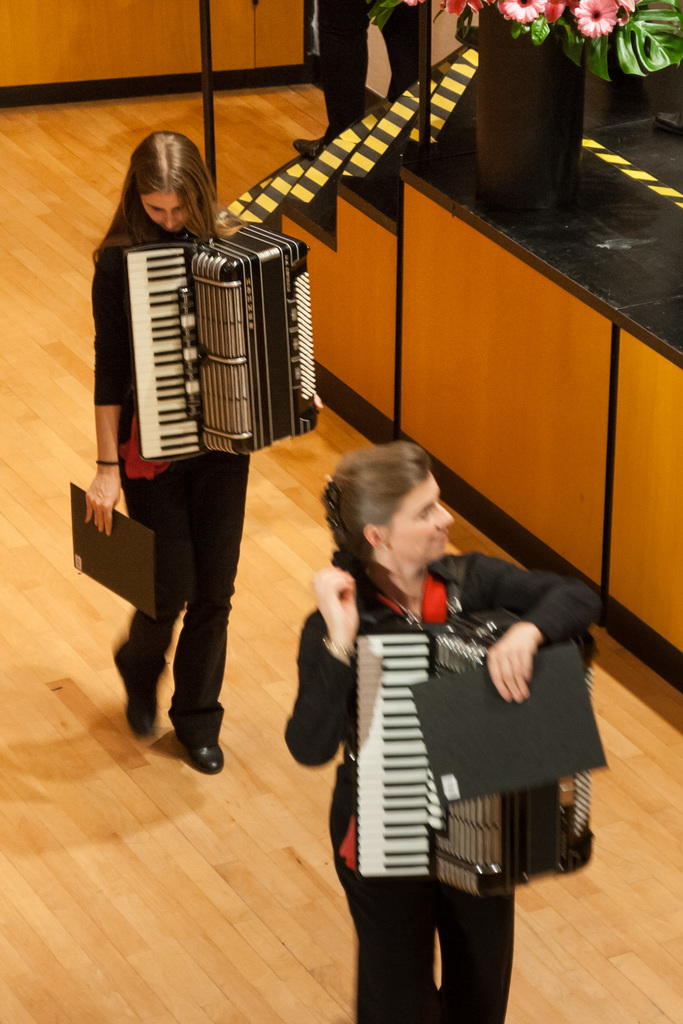

In [113]:
from IPython.display import Image
image_demo = './train_data_rkn/dataset/Accordion/00e50db1ace07231.jpg'
Image(image_demo)

In [97]:
type(image_demo)

str

In [121]:
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

description = describe(image_demo)
print(description)
catalog = './train_data_rkn/dataset/' + cb_model.predict(vectorizer.transform([description]))[0][0] 
data = []
for filename in os.listdir(catalog):
    file_path = os.path.join(catalog, filename)
    if os.path.isfile(file_path):
        try:
            # Получаем описание картинки
            desc = describe(file_path)  
            print(desc)
            # Добавляем данные в список
            data.append({
                'image_id': filename,
                'description': desc,                
            })
        except (IOError, SyntaxError) as e:
            print(f"Ошибка при обработке файла {image_path}: {e}")        


two young women are playing an accordion in a room . 
two men sitting on a park bench playing musical instruments . 
a group of people sitting in a living room playing instruments . 
a man in a cowboy hat playing an accordion . 
an older man playing an accordion while wearing a patriotic outfit . 
a person playing an accordion on stage with a microphone . 
a man holding an accordion while standing in front of a microphone . 
a man playing an accordion while standing in front of a microphone . 
a woman playing a guitar in front of an accordion . 
a woman sitting on a chair playing an accordion . 
a person playing an accordion in a dark room . 
a man holding an accordion while standing in front of a microphone . 
a group of people sitting on a sidewalk playing instruments . 
a group of people standing next to each other on the street . 
a couple of people that are playing instruments in a room . 
a man and a woman playing an accordion . 
a man plays a trumpet while another man plays a pi

In [122]:
# Find closest
cdf = pd.DataFrame(data)
cdf

,image_id,description
0,164066ca96251a53.jpg,two men sitting on a park bench playing musica...
1,ade8115e9a65a308.jpg,a group of people sitting in a living room pla...
2,04ebdcef386f13eb.jpg,a man in a cowboy hat playing an accordion .
3,121e470fd95521b9.jpg,an older man playing an accordion while wearin...
4,dc4d868011ed122c.jpg,a person playing an accordion on stage with a ...
...,...,...
195,9670cbe3706aa449.jpg,a woman 's hands on an accordion in a dark roo...
196,5f1451962c041a5a.jpg,a group of people standing next to each other ...
197,0d10183a0081c794.jpg,two young girls dressed in period clothing pos...
198,b9c77b5ee2c064a5.jpg,a man holding an accordion while sitting next ...


Most similar description: a group of men in suits and hats playing musical instruments . 
57072a35319819f3.jpg


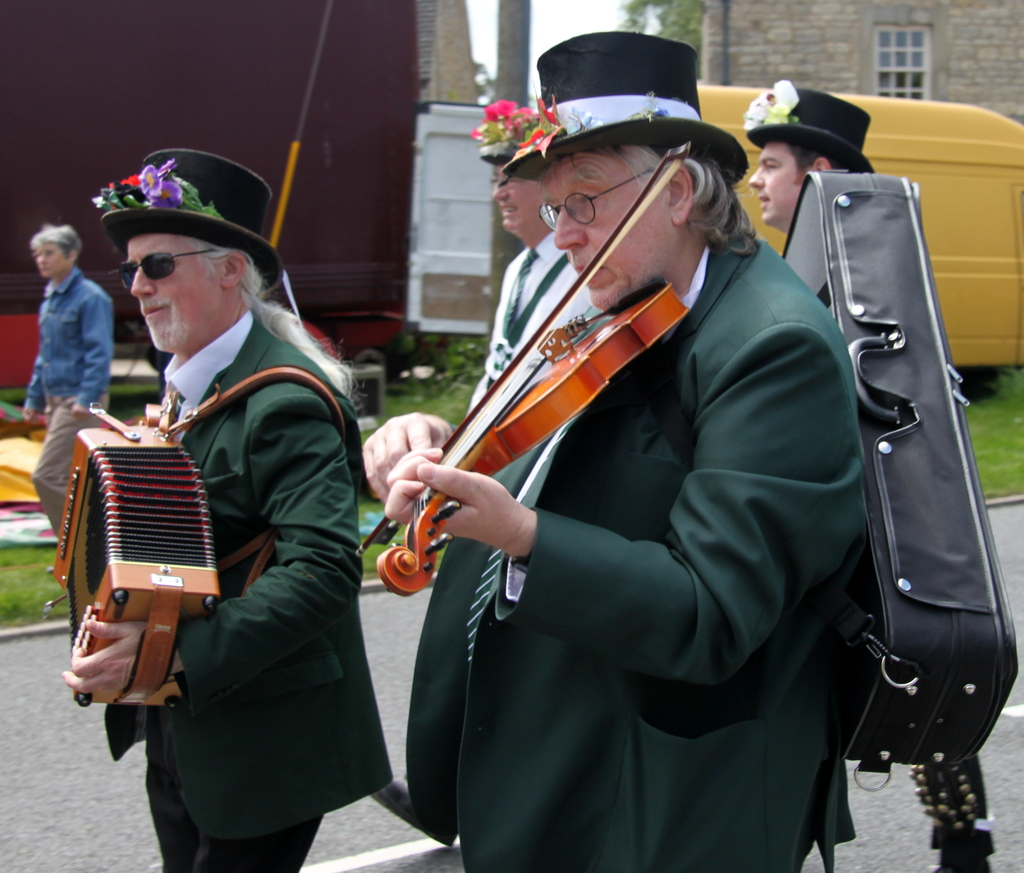

In [136]:
from IPython.display import Image
tfidf_matrix = vectorizer.fit_transform(cdf["description"] + [description])

# Вычисление косинусного сходства
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Поиск максимально похожего описания
most_similar_index = cosine_similarities.argmax()
most_similar_description = cdf["description"][most_similar_index]

print(f"Most similar description: {most_similar_description}")
print(cdf["image_id"][most_similar_index])
Image(os.path.join(catalog, str(cdf["image_id"][most_similar_index])))

In [142]:
import numpy as np

# Получение индексов, отсортированных по убыванию значений сходства
sorted_indices = np.argsort(cosine_similarities)
sorted_indices[0][:10]

array([ 15, 117, 161, 178, 197, 107, 104, 143,  18,  36])

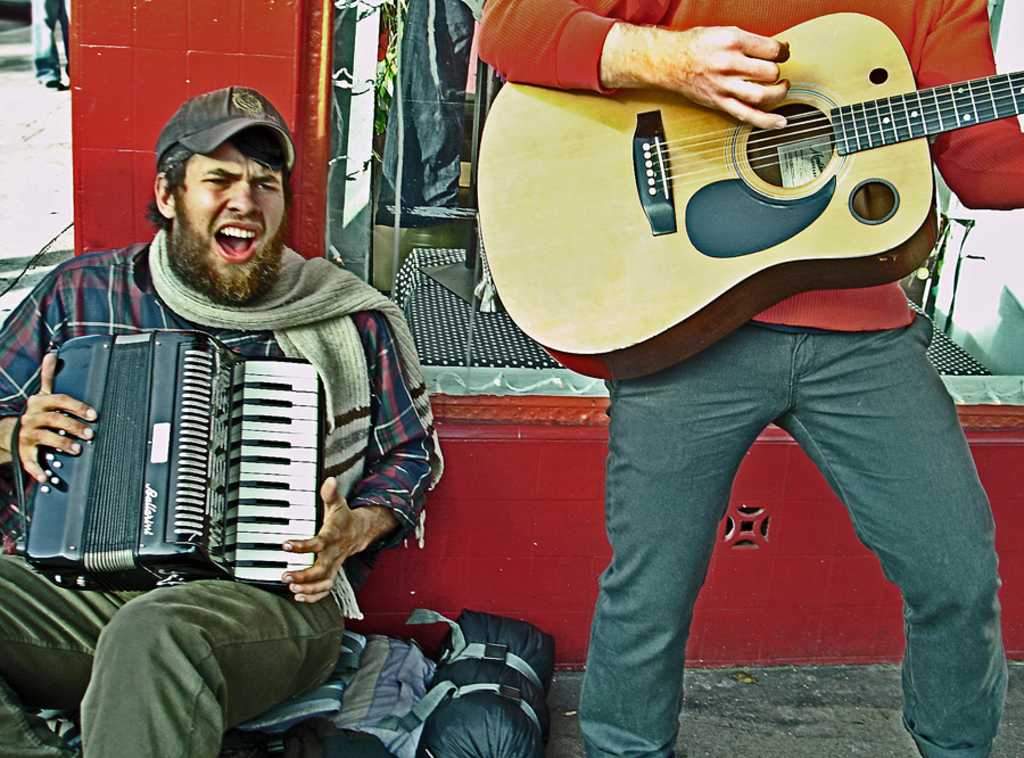

In [147]:
from IPython.display import Image
Image(os.path.join(catalog, str(cdf["image_id"][sorted_indices[0][1]])))
Image(os.path.join(catalog, str(cdf["image_id"][sorted_indices[0][2]])))